In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv


### Load packages

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.api as sm
%matplotlib inline

In [6]:
df = pd.read_csv('../input/ibm-watson-marketing-customer-value-data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


### Generate engage category

In [7]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0


### Engagement Rate

In [8]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


### Engage By Renew Offer Type

In [9]:
engagement_by_offer_type_df = pd.pivot_table(
    df, values='Response', index='Renew Offer Type', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_offer_type_df.columns = ['Not Engaged', 'Engaged']
engagement_by_offer_type_df

,Not Engaged,Engaged
Renew Offer Type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


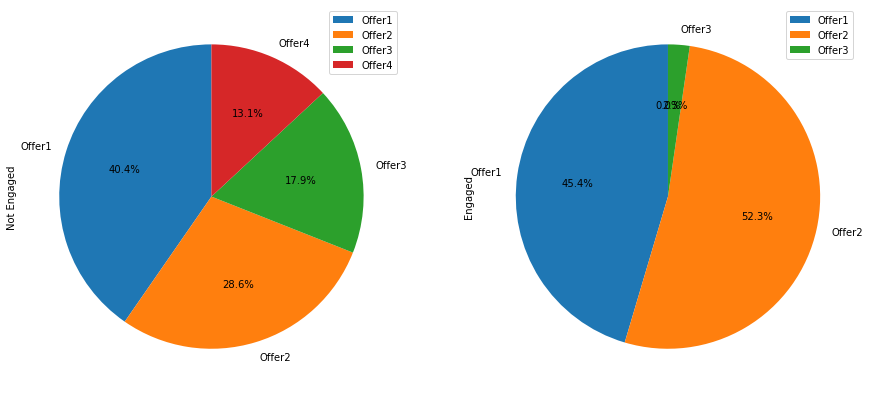

In [10]:
engagement_by_offer_type_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### Engage By Sales Channel

In [11]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


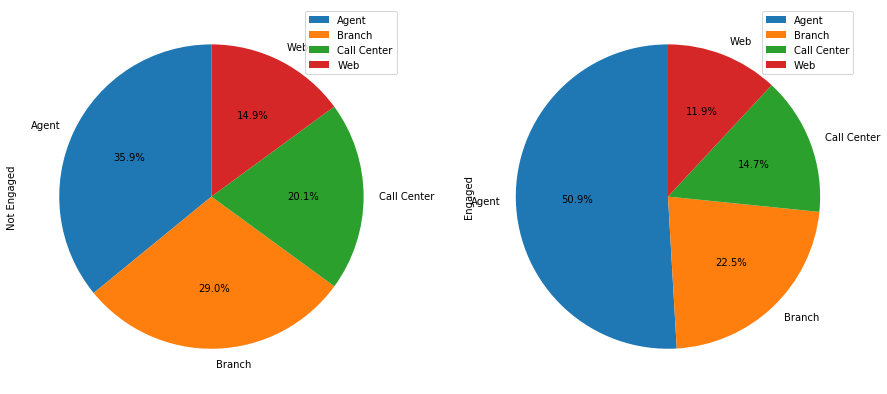

In [12]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### Total Claim Amount Distributions

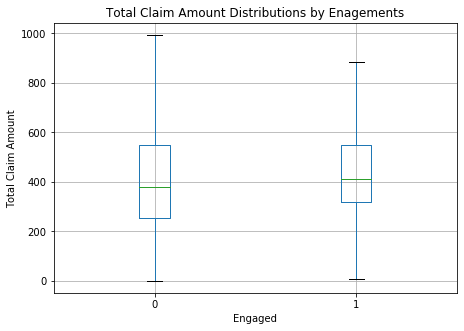

In [13]:

ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=False,  ## this will help remove outlier
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

If we don't want to remove outliers

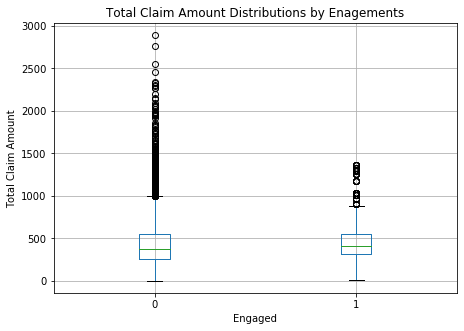

In [14]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Enagements')

plt.suptitle("")
plt.show()

### Income Distributions

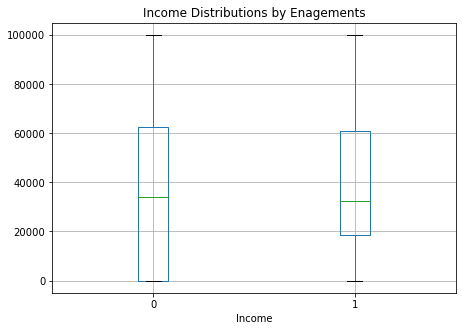

In [15]:
ax = df[['Engaged', 'Income']].boxplot(
    by='Engaged',
    showfliers=True,
    figsize=(7,5)
)

ax.set_xlabel('Engaged')
ax.set_xlabel('Income')
ax.set_title('Income Distributions by Enagements')

plt.suptitle("")
plt.show()

In [16]:
df.groupby('Engaged').describe()['Income'].T


Engaged,0,1
count,7826.000000,1308.000000
mean,37509.190008,38544.027523
std,30752.259099,28043.637944
min,0.000000,0.000000
25%,0.000000,18495.000000
50%,34091.000000,32234.000000
75%,62454.250000,60880.000000
max,99981.000000,99845.000000


### Regression using different features

In [18]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

In [22]:
df['Engaged']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: Engaged, Length: 9134, dtype: int64

In [24]:
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

In [25]:
logit_fit = logit.fit()


Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [26]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 May 2020   Pseudo R-squ.:                -0.02546
Time:                        16:48:28   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

Looking at this model output, we can see that Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, and Number of Policies variables have significant relationships with the output variable, Engaged. For example, Number of Policies variable is significant and is negatively correlated with Engaged. This suggests that the more policies that the customers have, the less likely they are to respond to marketing calls. As another example, the Months Since Last Claim variable is significant and is negatively correlated with the output variable, Engaged. This means that the longer it has been since the last claim, the less likely that the customer is going to respond to marketing calls.

Next we add categorical variables. There are several ways to deal with categorical variables

**factorize**

In [27]:
labels, levels = df['Education'].factorize()

In [28]:
labels

array([0, 0, 0, ..., 0, 1, 1])

In [29]:
levels

Index(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'], dtype='object')

**pandas' Categorical variable series**

In [30]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [31]:
categories.categories

Index(['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'], dtype='object')

In [32]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

**Dummy variables**

In [33]:
pd.get_dummies(df['Education']).head(10)

,Bachelor,College,Doctor,High School or Below,Master
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,0,0,0,1
8,1,0,0,0,0
9,0,1,0,0,0


In [34]:
gender_values, gender_labels = df['Gender'].factorize()
df['GenderFactorized'] = gender_values
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
df['EducationFactorized'] = categories.codes


In [35]:
logit = sm.Logit(
    df['Engaged'], 
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [36]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [37]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 May 2020   Pseudo R-squ.:                 -0.2005
Time:                        16:54:00   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

### All together in logistic regression

In [38]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

In [39]:
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 May 2020   Pseudo R-squ.:                -0.02454
Time:                        16:54:33   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

Let's take a closer look at this output. The Income, Monthly Premium Auto, Months Since Last Claim,Months Since Policy Inception, Number of Open Complaints, Number of Policies, and GenderFactorized variable are significant at a 0.05 significance level, and all of them have negative relationships with the output variable, Engaged. Hence, the higher the income is, the less likely that the customer will be engaged with marketing calls. Similarly, the more policies that the customer has, the less likely that he or she will be engaged with marketing calls.

Lastly, male customers are less likely to engage with marketing calls than female customers, which we can see from looking at the coefficient of GenderFactorized. From looking at this regression analysis output, we can easily see the relationships between the input and output variables, and we can understand which attributes of customers are positively or negatively related to customer engagement with marketing calls